# Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Variables

In [2]:
ds_EU27_emissions = '02.Transformed data/01.EU27_emissions.csv'
ds_EU27_passengers = '02.Transformed data/02.EU27_passengers.csv'
ds_EU27_emissions_proCapita = '02.Transformed data/03.EU27_emissions_proCapita.csv'

# Data load

In [3]:
df_EU27_emissions = pd.read_csv(ds_EU27_emissions,header=0, dtype='unicode')
df_EU27_emissions.head()

,Year,As,BC,CO,Cd,Cr,Cu,Hg,Indeno,NH3,...,rolling_Pb,rolling_SOx,rolling_Se,rolling_TSP,rolling_Zn,rolling_benzo(a),rolling_benzo(b),rolling_benzo(k),rolling_dioxin,rolling_total PAH
0,1990,0.0010706583437681168,2.298695967611378,514.841454009687,0.0037068754063681267,0.044906297762217065,0.13748748322109997,0.013896042694740797,0.01669187062495867,0.7722625047804527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,0.0008961833284311209,2.193775083707556,453.1771446593765,0.003174836075685954,0.04456608009598843,0.13675802775701149,0.013337960143066686,0.008351337230203943,0.7574847778182009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,0.0008532842477858469,2.215152635542245,518.329997989861,0.003329845735909733,0.04801714944468461,0.14664471602864207,0.01332134566528747,0.008160260074080548,0.816351366749893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,0.0010540516768685051,2.199277977126361,620.1875427103782,0.003154412296552426,0.04941245354172822,0.16406682382687274,0.013582999826406936,0.01008792692180828,0.8594350015276544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,0.0010496970613578574,2.2232963007819677,535.0439745147393,0.0034695970460168783,0.05286581224680114,0.17400827485950834,0.013986450836616125,0.01214571984268938,0.8932032901968613,...,113.13743122485482,17.319537298556448,0.033362990698286035,4.618215274198667,1.0788939125653165,0.006956847937287141,0.049501423970143996,0.006006779222798963,0.015186436805094983,0.07424777426655556


In [4]:
df_EU27_passengers = pd.read_csv(ds_EU27_passengers,header=0, dtype='unicode')

In [5]:
df_EU27_passengers['Year'] = df_EU27_passengers['Year'].astype("int")
df_EU27_passengers['Passengers'] = df_EU27_passengers['Passengers'].astype("int")

In [6]:
df_EU27_passengers.head()

,Year,Passengers
0,2013,746100398
1,2014,781202599
2,2015,819698948
3,2016,871695782
4,2017,938854476


In [7]:
df_EU27_emissions_proCapita = pd.read_csv(ds_EU27_emissions_proCapita,header=0, dtype='unicode')

In [8]:
cols = df_EU27_emissions.columns
for col in cols:
    if col != 'Year':
        df_EU27_emissions[col] = df_EU27_emissions[col].astype(float)

df_EU27_emissions['Year'] = df_EU27_emissions['Year'].astype("int")

In [9]:
df_EU27_emissions_proCapita.head()

,Year,As,BC,CO,Cd,Cr,Cu,Hg,Indeno,NH3,...,rolling_Pb,rolling_SOx,rolling_Se,rolling_TSP,rolling_Zn,rolling_benzo(a),rolling_benzo(b),rolling_benzo(k),rolling_dioxin,rolling_total PAH
0,2013,2.4144962634410255e-06,0.00380206111416348,0.48850769581349696,8.412157647845394e-06,0.0001335259871009289,0.00042206658760923495,3.569670801910459e-05,2.9213900674490623e-05,0.0020009167277339874,...,0.06509183633208487,0.03936694450847717,0.0001049615994259956,0.00935873656329379,0.0026492674596447024,1.3468293452694253e-05,0.00010014392150577369,1.1869948953657979e-05,2.5290887094651778e-05,0.0001597409908872752
1,2014,2.46290368674611e-06,0.0036988102899907812,0.48248308966723985,8.208499963178617e-06,0.0001323420907087923,0.0004187416222197545,3.565564375581939e-05,2.8227828769285417e-05,0.0018458549043743374,...,0.05865634612693187,0.03781117191064235,0.00010030902035747081,0.008936316301051399,0.0025166130145615456,1.3169078944079105e-05,9.830349471379454e-05,1.161782715052301e-05,2.4481067180130133e-05,0.00015602558298450492
2,2015,2.543898031198045e-06,0.0036305193267052466,0.4834710932961522,8.055789430943001e-06,0.00013238764359831915,0.00041507847005617306,3.6059544831025735e-05,2.7114446634925047e-05,0.0017584954200549412,...,0.05357338440346941,0.036372859484823536,9.561841884676014e-05,0.008559786952761215,0.0024202372582563434,1.2875614105663426e-05,9.641895388674433e-05,1.1366391283048855e-05,2.3674489593122094e-05,0.00015231563245730388
3,2016,2.5242761080303825e-06,0.0036280084140254236,0.5278685256795052,8.021697296924926e-06,0.00013447677638225148,0.00041387740588276294,3.651298868313182e-05,2.7048397698654312e-05,0.0017788602094974495,...,0.04779483125508013,0.03477917646778935,9.042148859386477e-05,0.008170268120422017,0.002340938295155888,1.2425656811847058e-05,9.333944175389104e-05,1.097748430001074e-05,2.2519948135502143e-05,0.00014706703869889356
4,2017,2.681607907939555e-06,0.003667035301837571,0.522864271256791,7.97493216531102e-06,0.00013511592001548106,0.00040437309958427645,3.784009834416195e-05,2.7058610515627633e-05,0.0018041647158455448,...,0.04230320638235215,0.03333311369645369,8.5717554182938e-05,0.0078399038887433,0.0023371793214214793,1.2189479919678359e-05,9.185765215422046e-05,1.0780923443693652e-05,2.137989421139279e-05,0.00014410192429882036


# Plotting

## Passengers

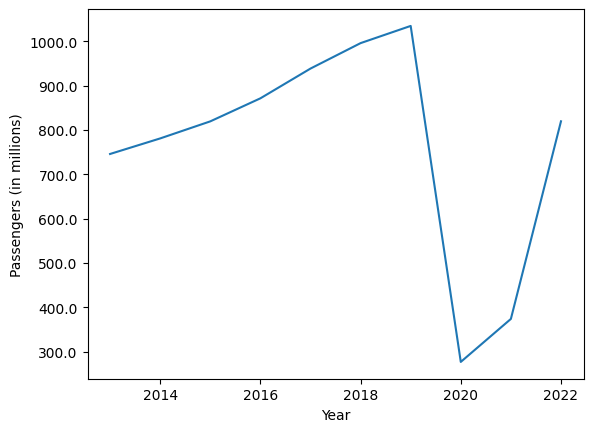

In [10]:
def millions_formatter(x, pos):
    return f'{x / 1000000}'

fig, ax = plt.subplots()
sns.lineplot(x = "Year", y = "Passengers", data=df_EU27_passengers)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_ylabel('Passengers (in millions)')
plt.show()

## Emissions

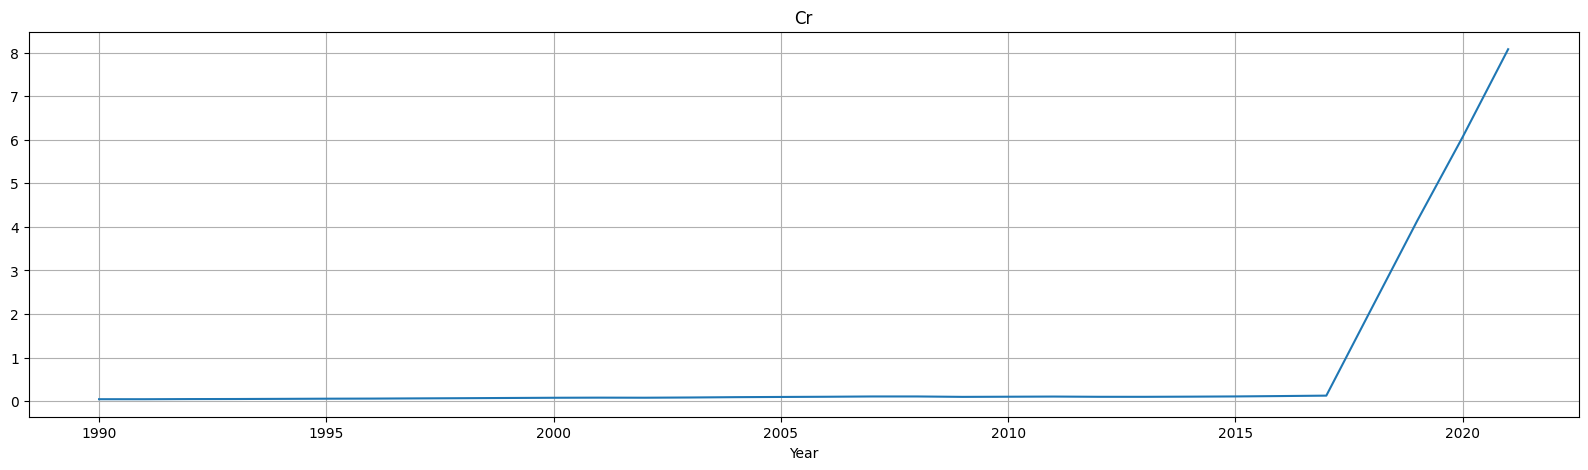

In [11]:
fig, ax1 = plt.subplots(figsize=(20,5))
plt.title('Cr') 

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.plot(df_EU27_emissions['Year'], df_EU27_emissions['Cr']) 


plt.grid()
plt.show() 

In [12]:
pollutants = []

# Iterate over column names
for column in df_EU27_emissions:
    if column != 'Year':
        if 'rolling_' not in column:
            df_EU27_emissions['rolling_'+column] = df_EU27_emissions[column].rolling(5).mean()
            pollutants.append(column)

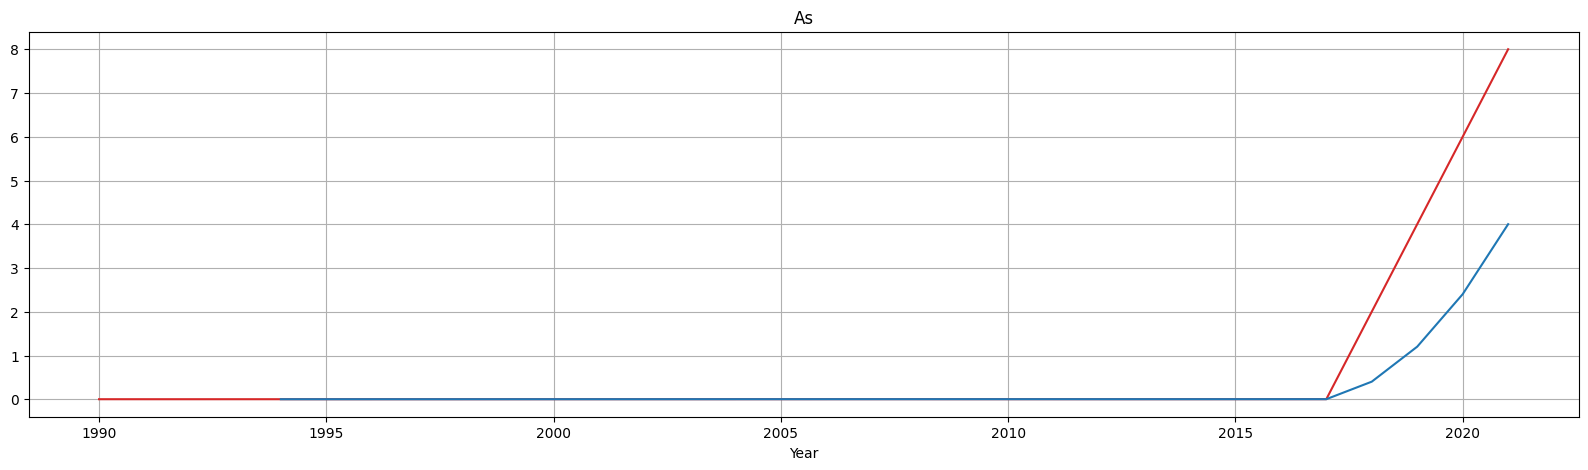

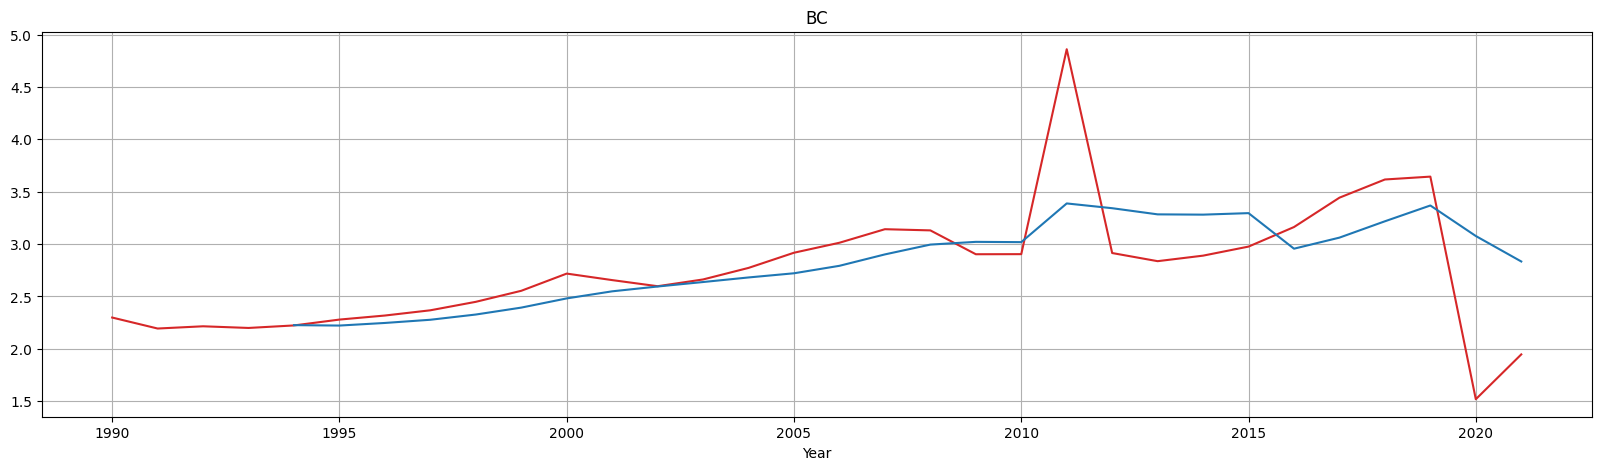

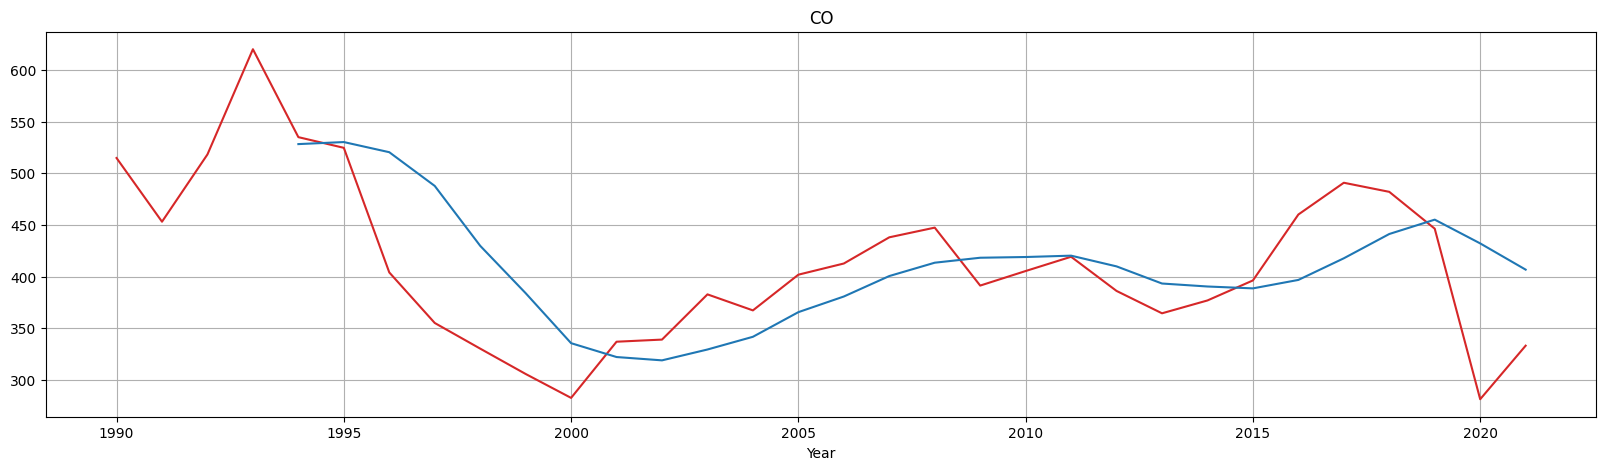

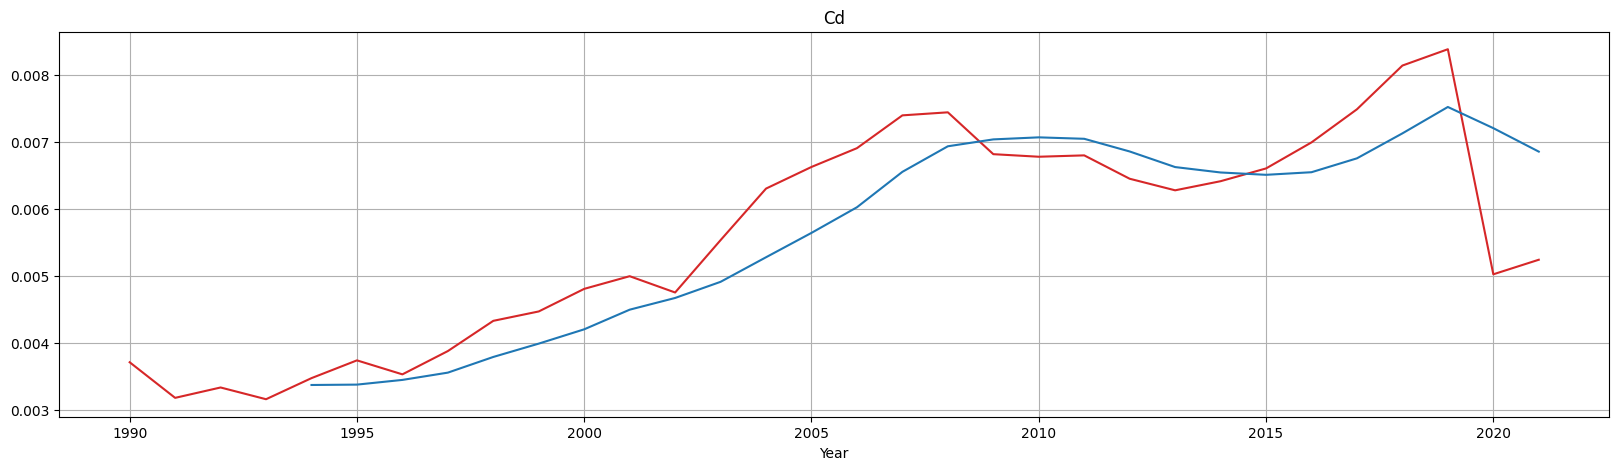

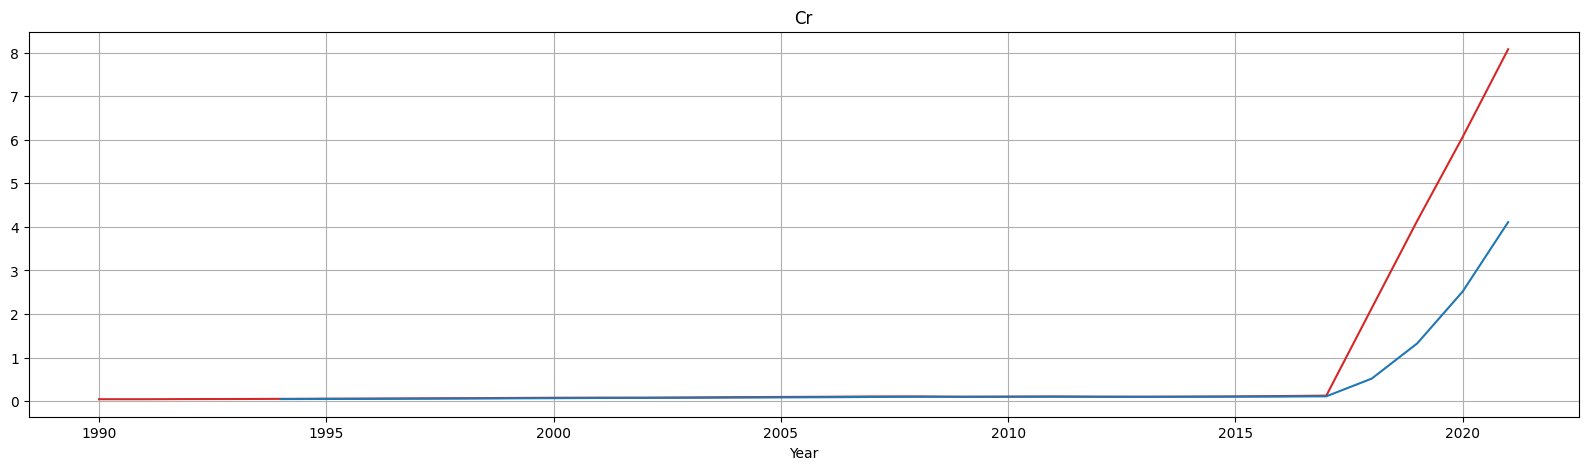

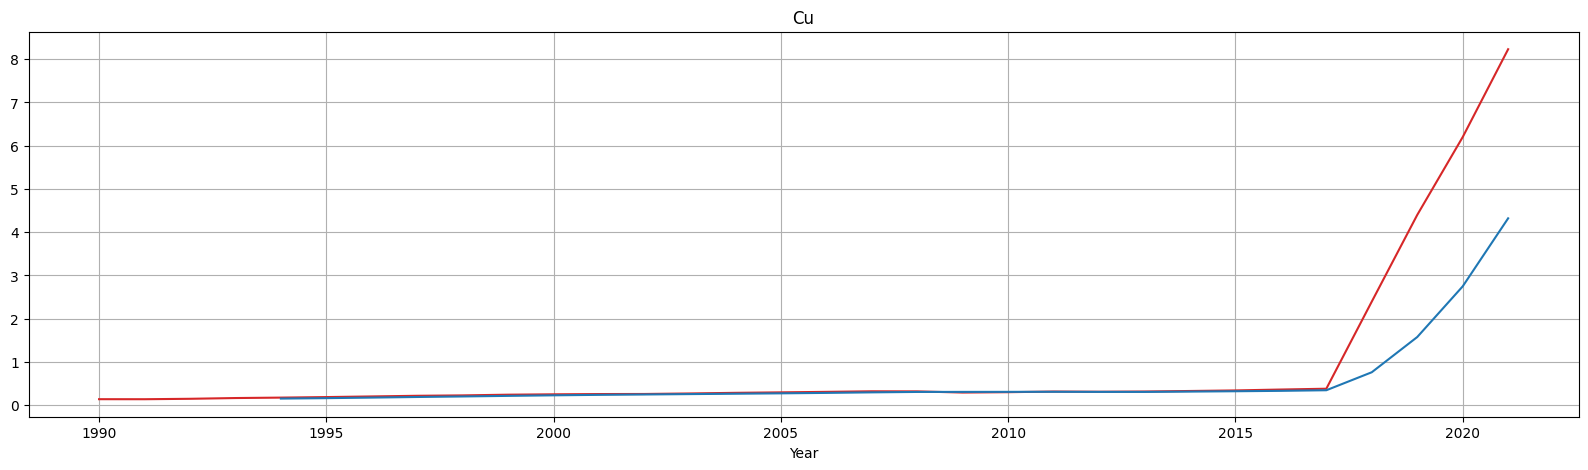

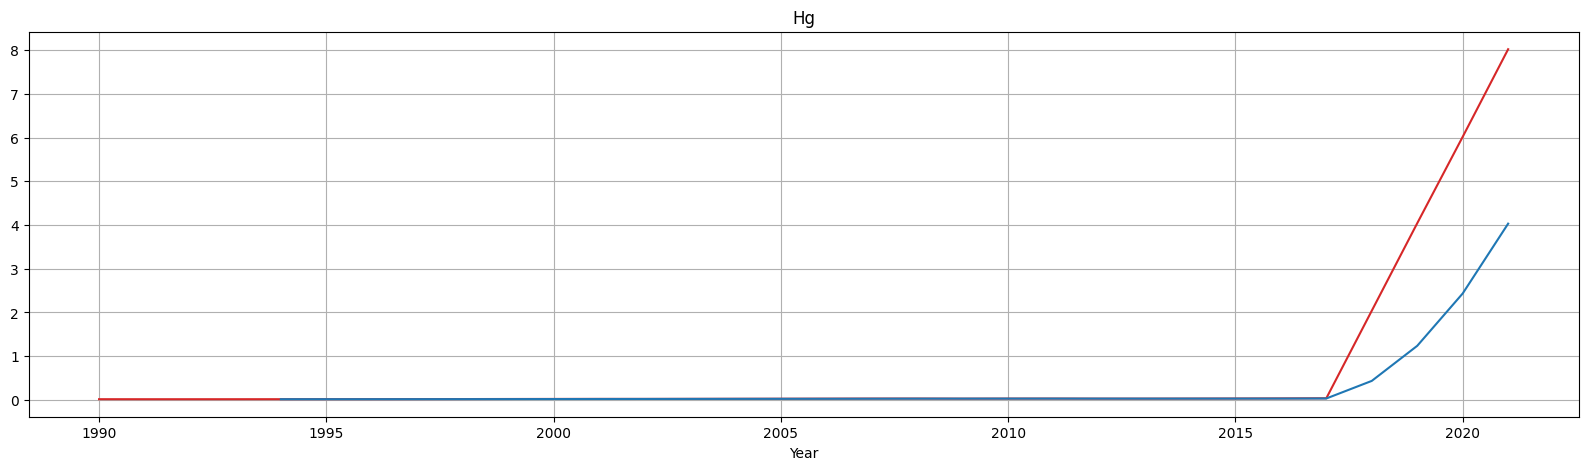

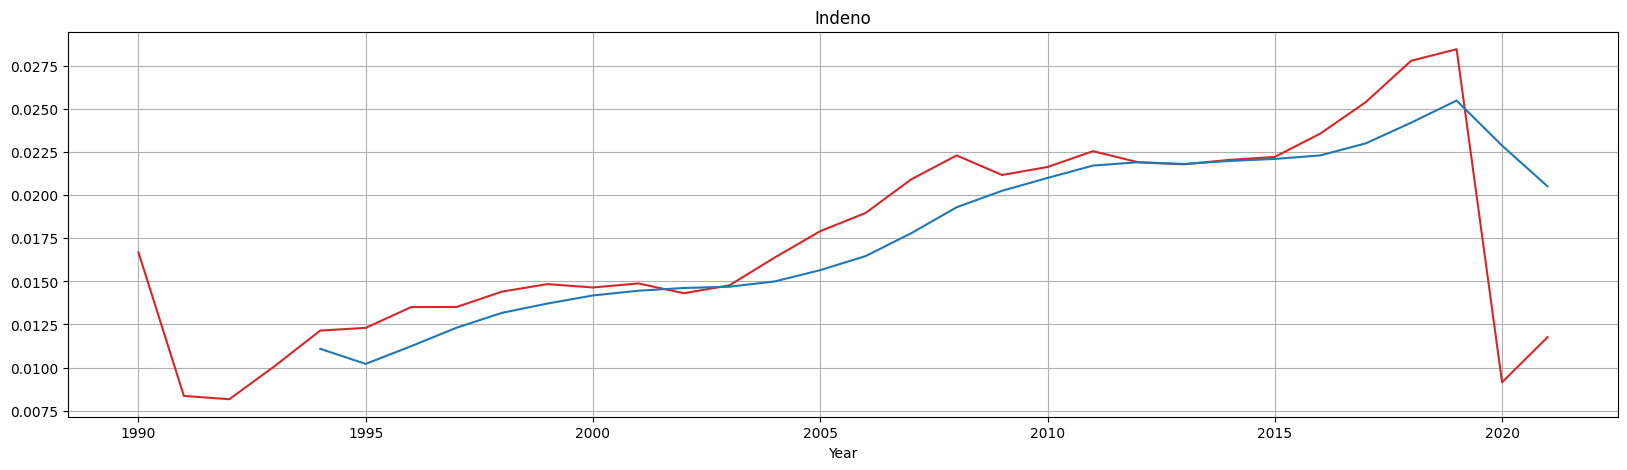

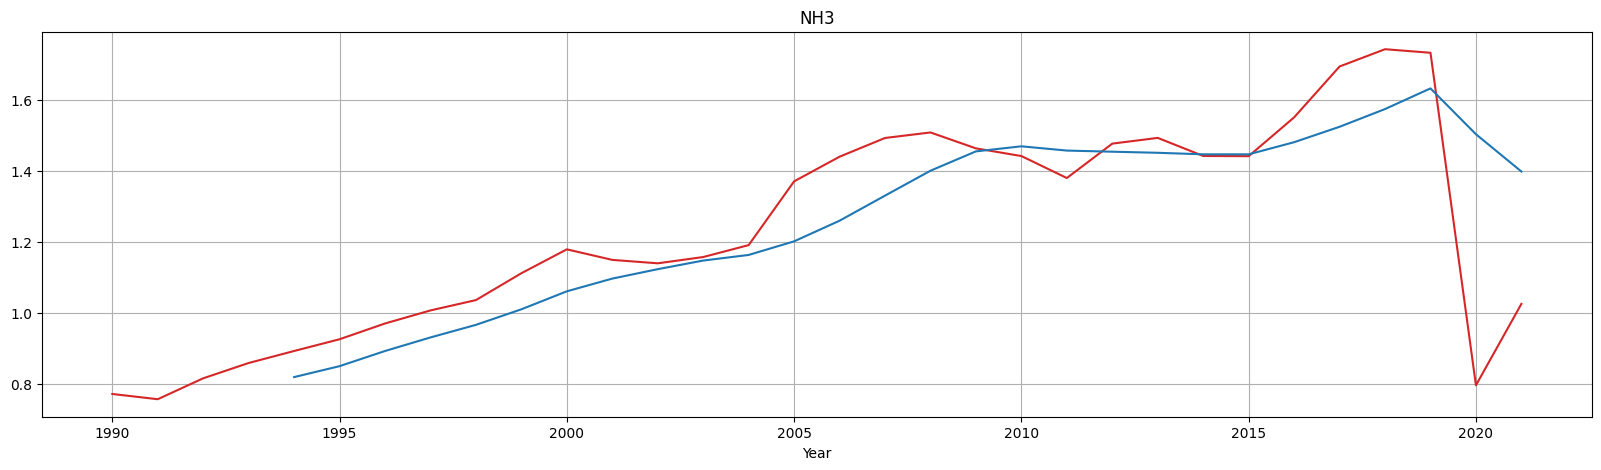

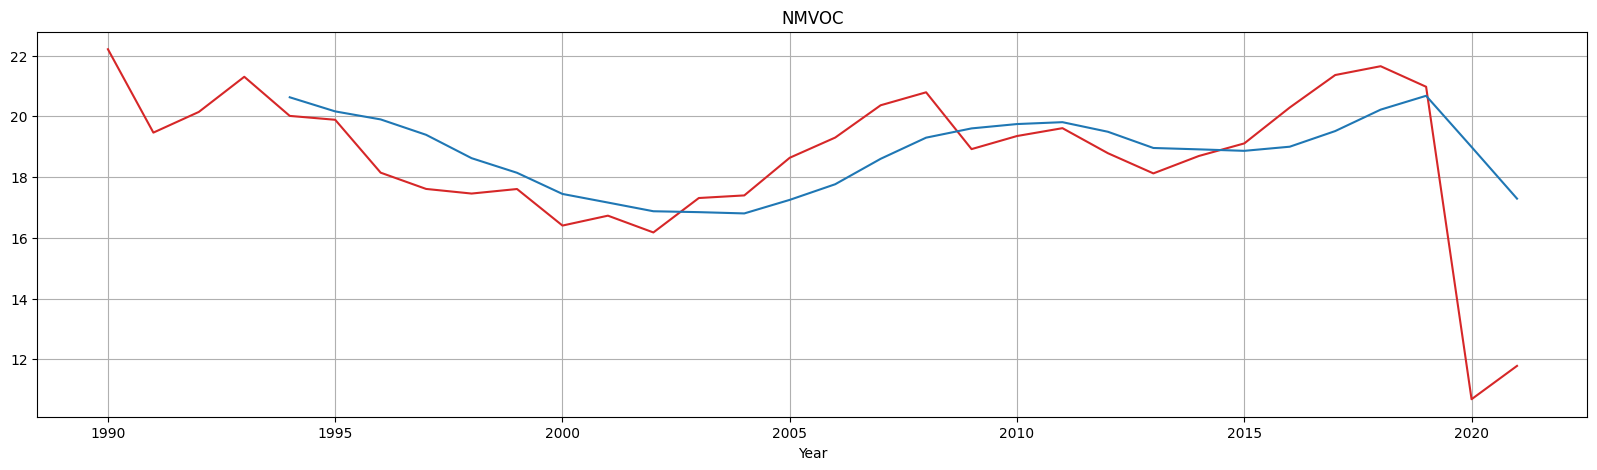

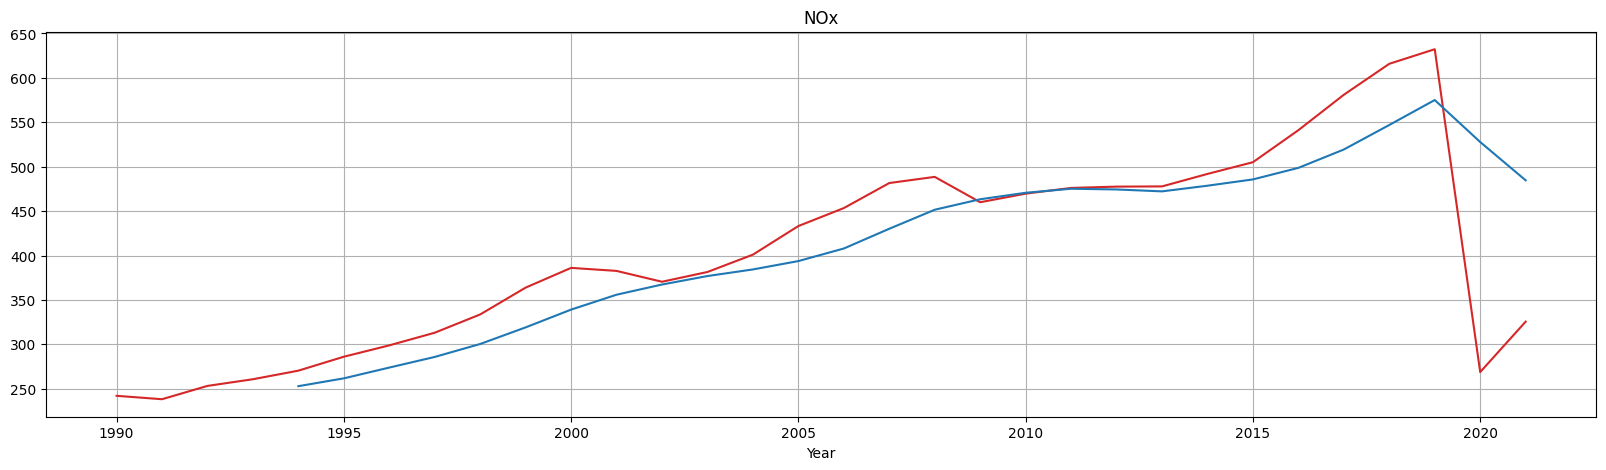

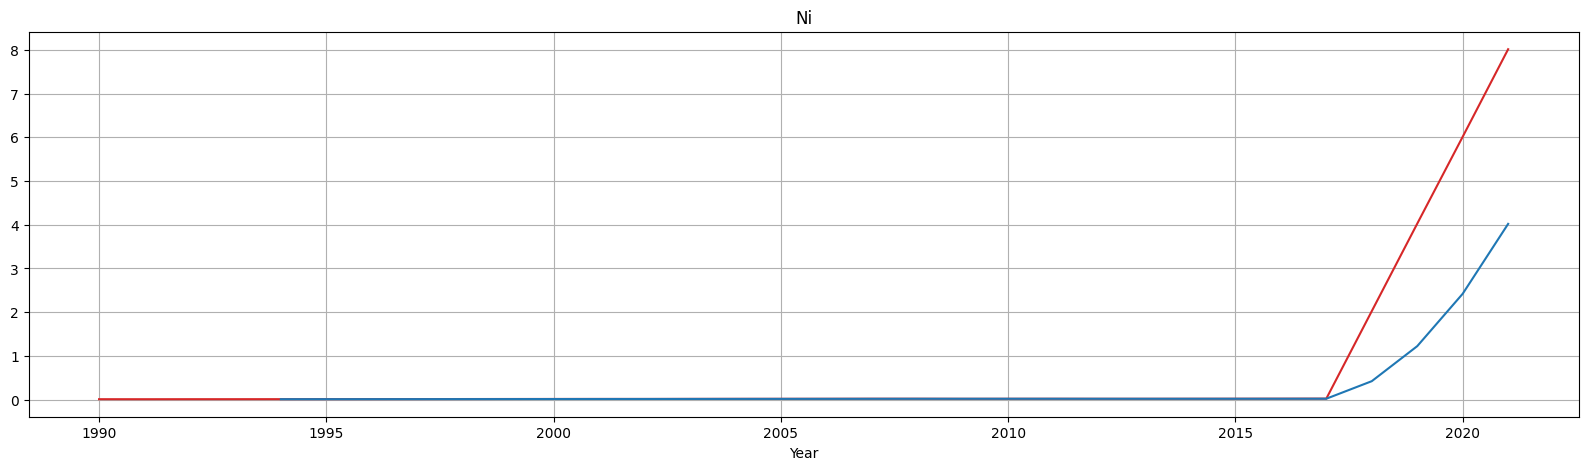

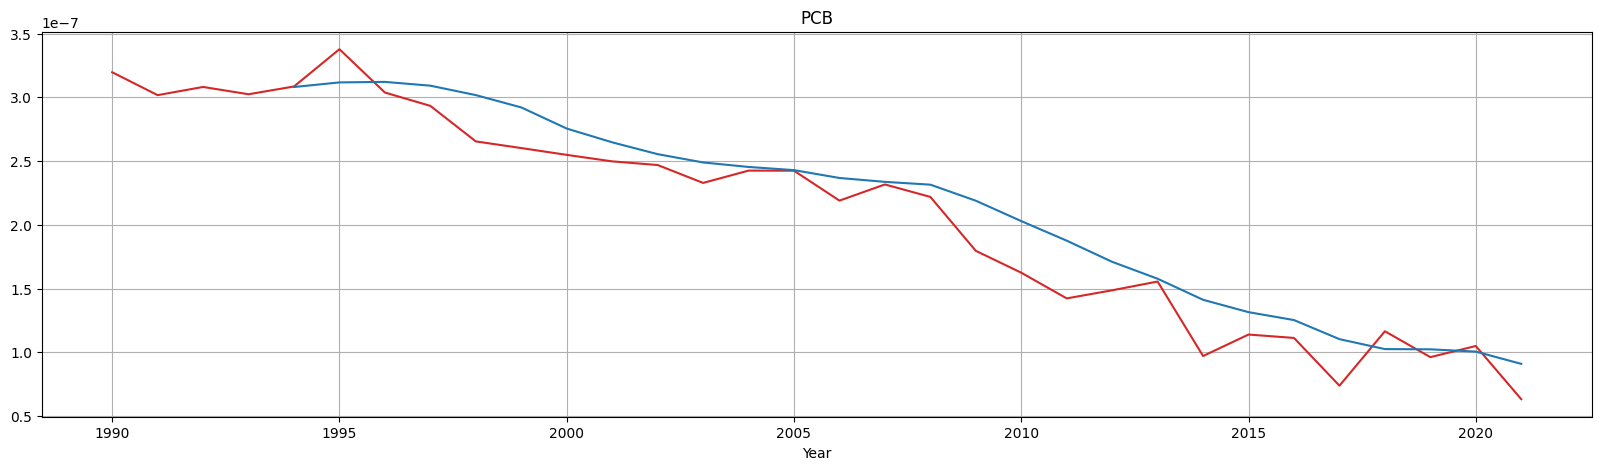

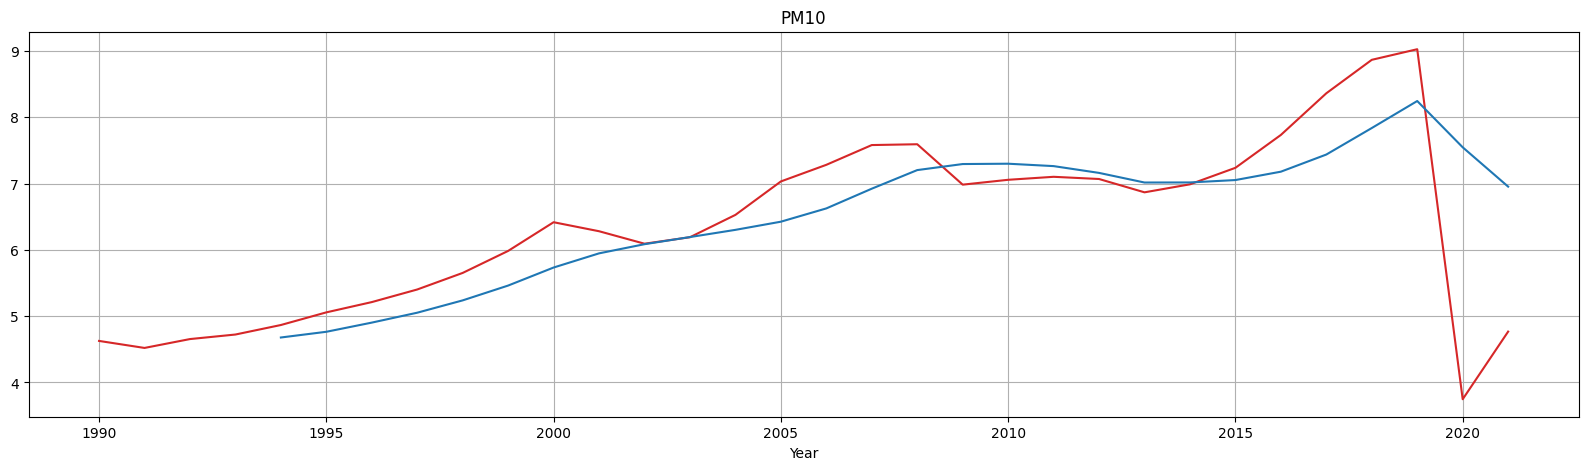

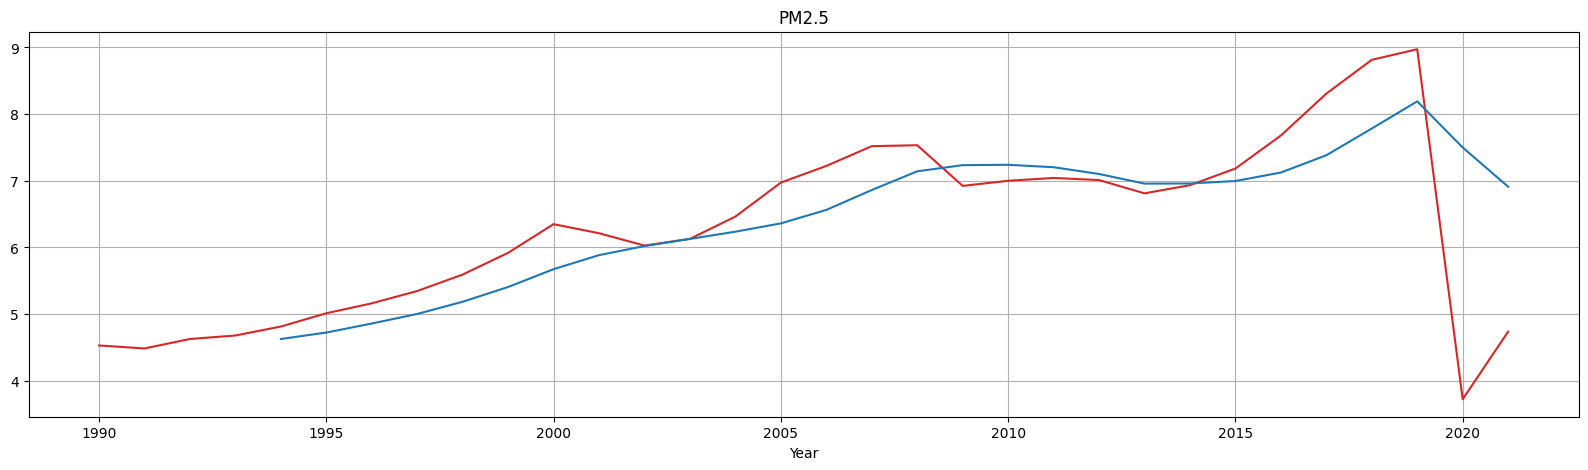

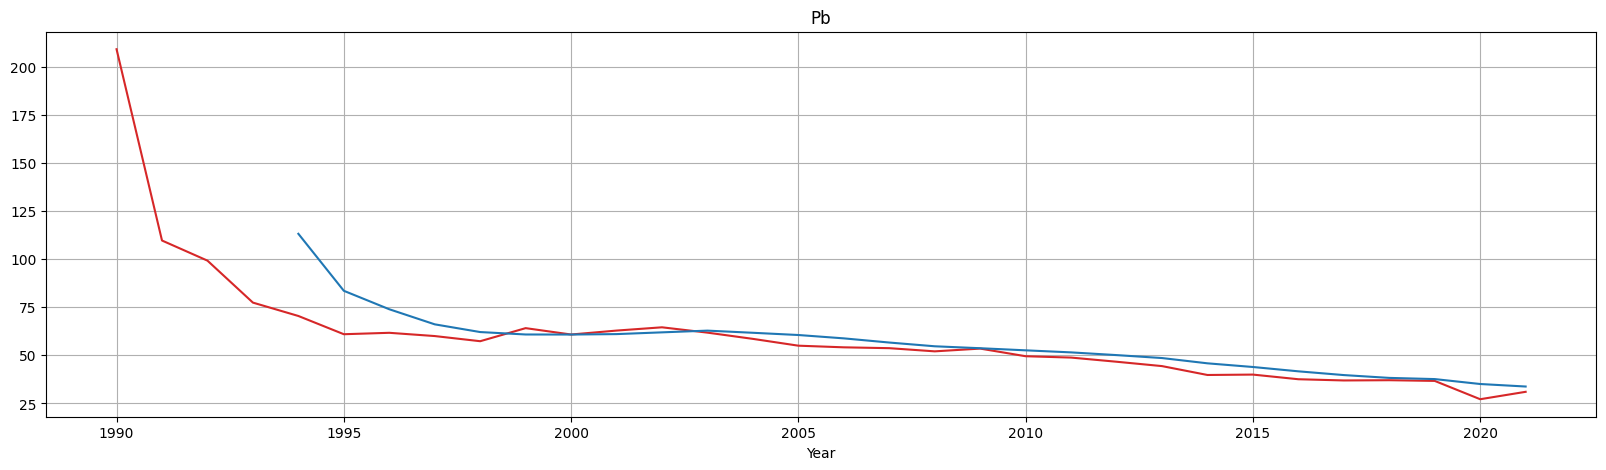

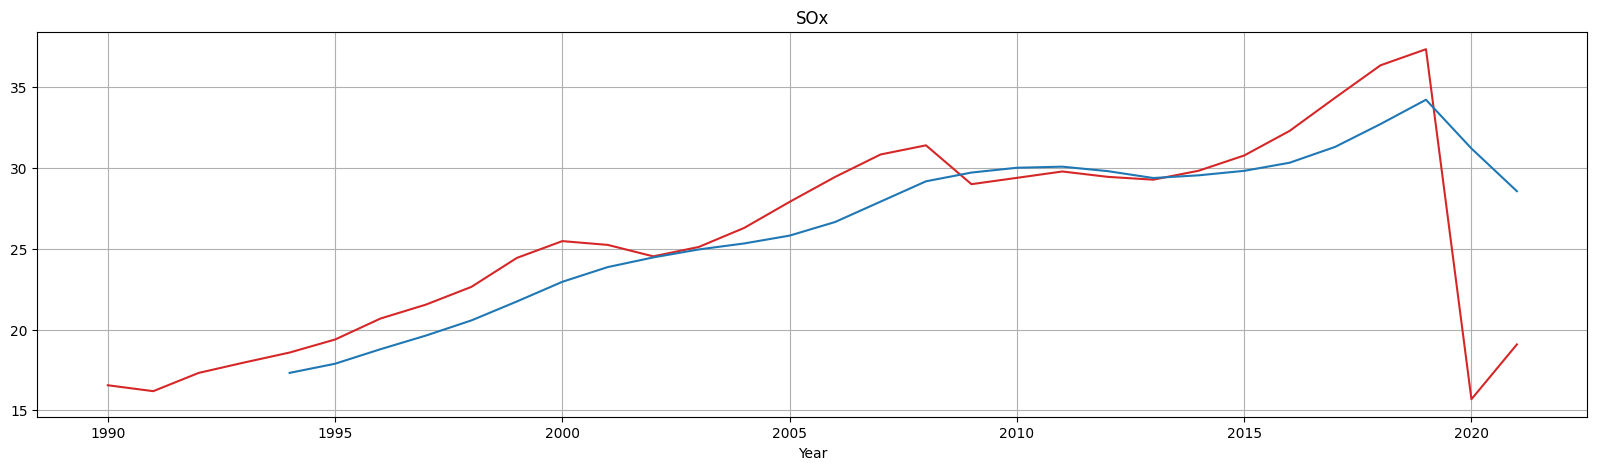

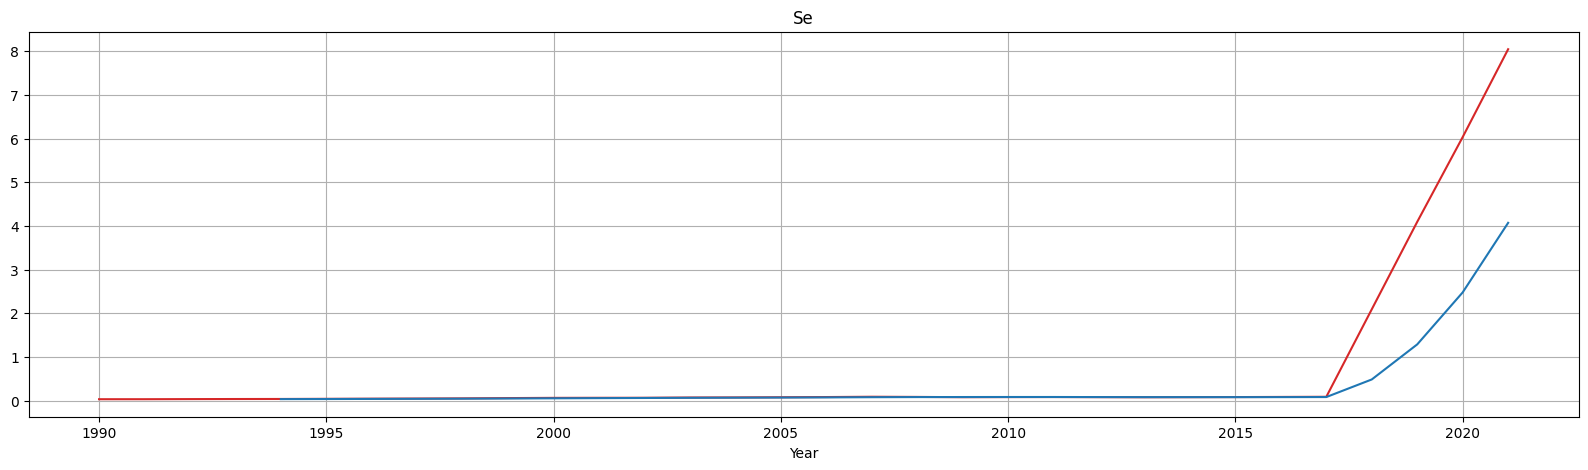

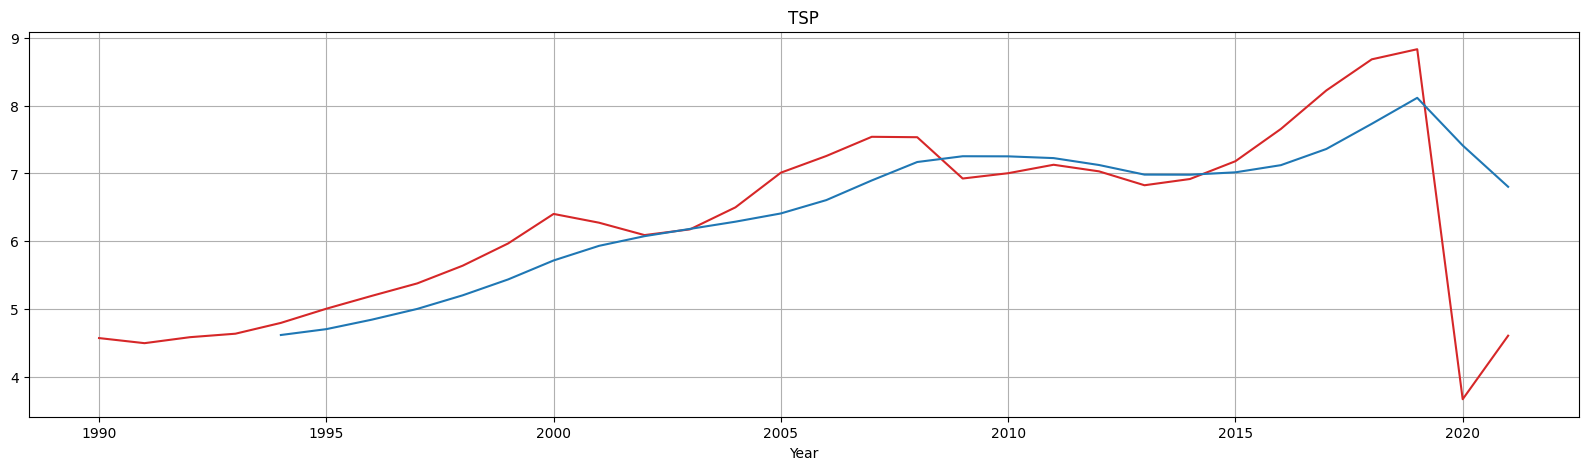

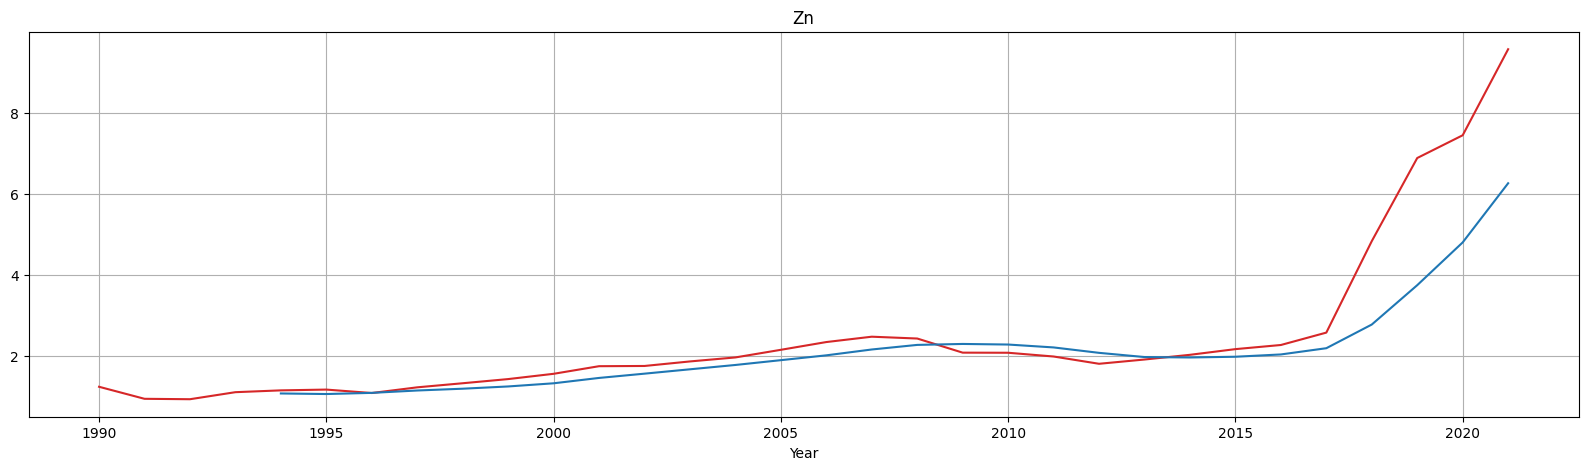

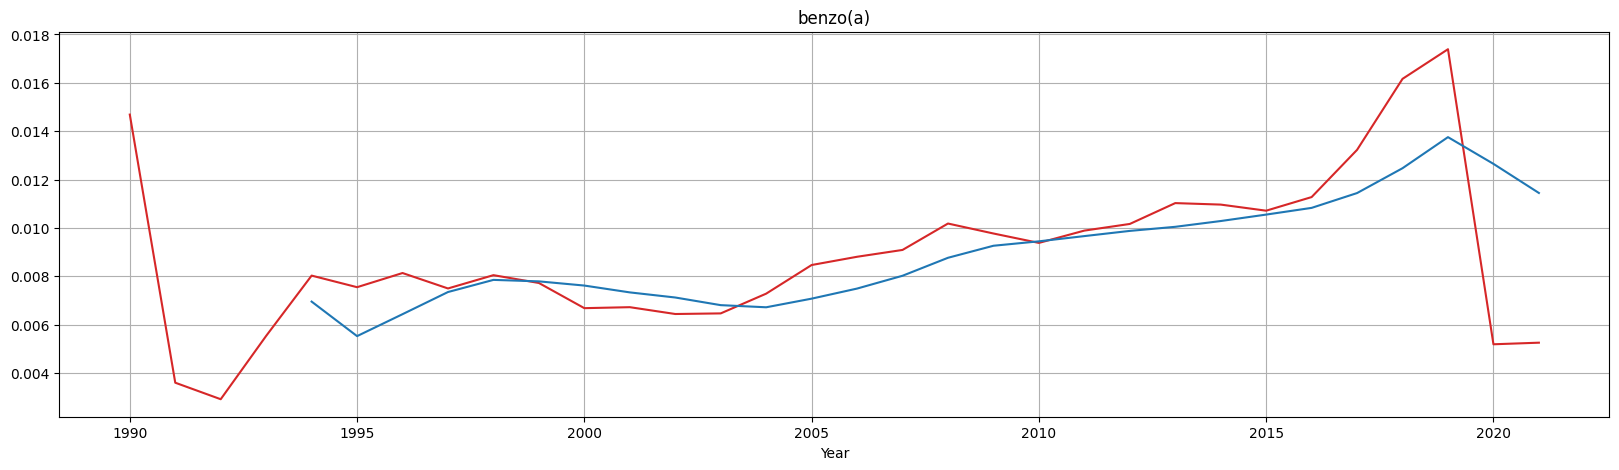

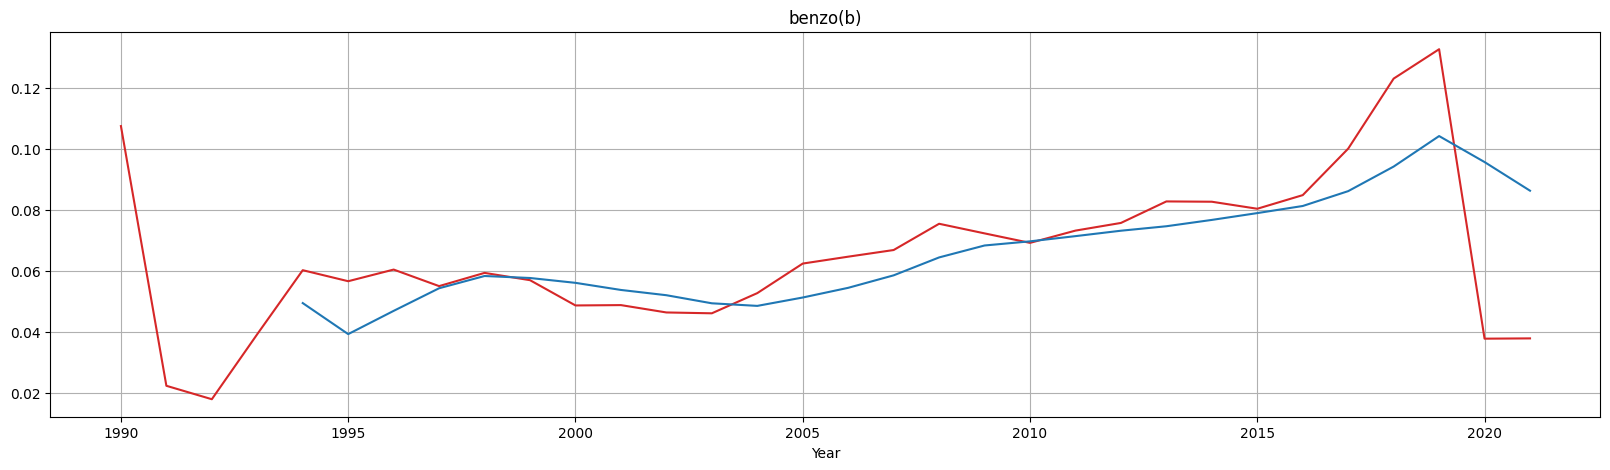

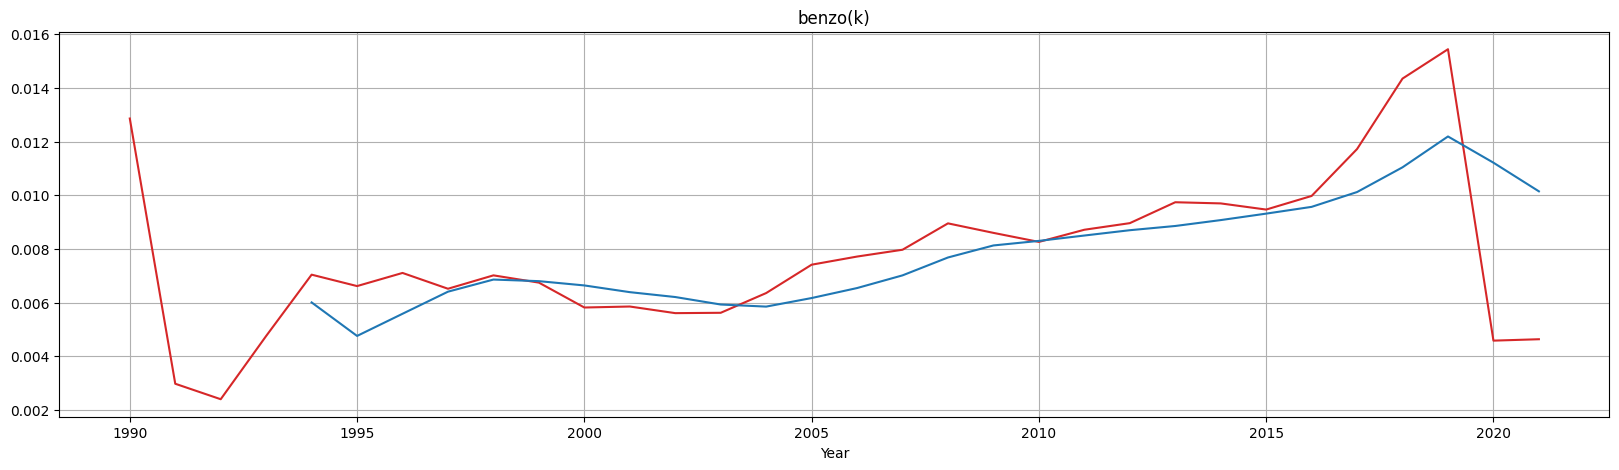

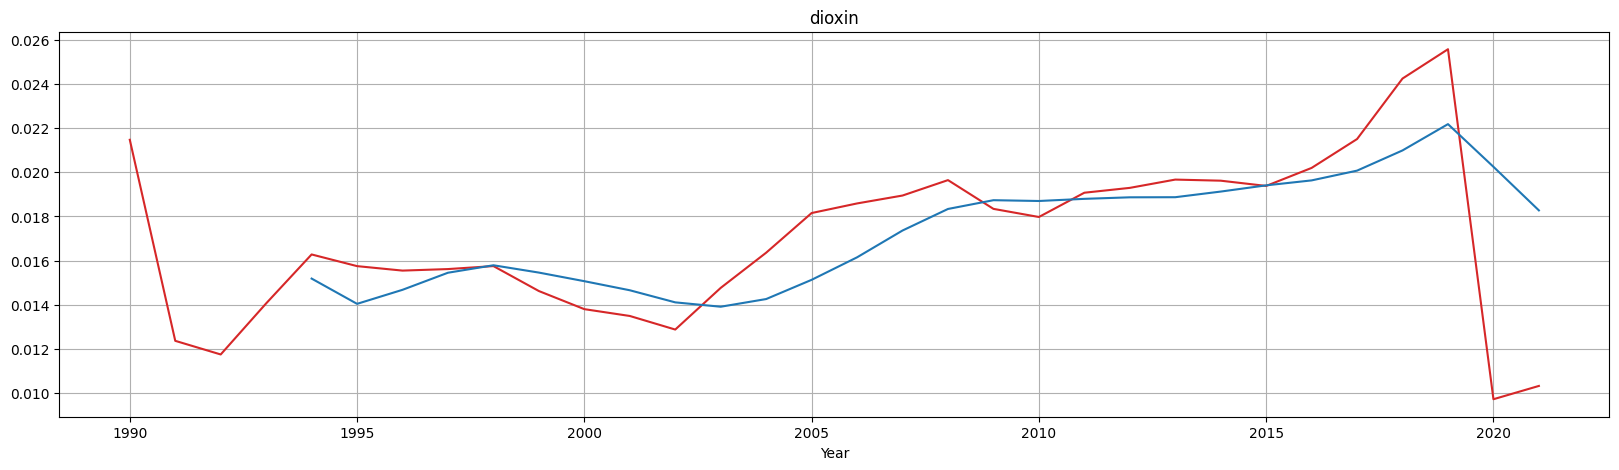

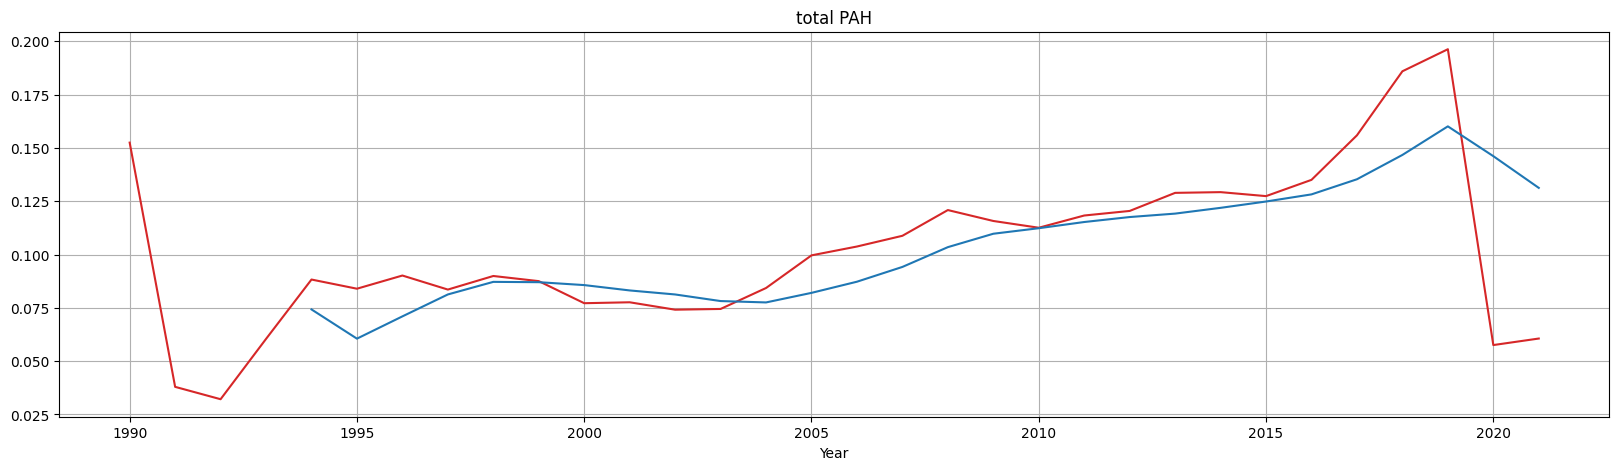

In [13]:
for x in pollutants:
    fig, ax1 = plt.subplots(figsize=(20,5))
    plt.title(x) 

    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.plot(df_EU27_emissions['Year'], df_EU27_emissions[x],color=color) 
    
    
    color = 'tab:blue'
    ax1.plot(df_EU27_emissions['Year'], df_EU27_emissions['rolling_'+x],color=color) 
    
    plt.grid()
    plt.show() 

In [14]:
print(df_EU27_emissions['Year'].corr(df_EU27_emissions['NH3']))

0.7216874807280897


In [15]:
print(df_EU27_emissions['Year'].corr(df_EU27_emissions['Pb']))

-0.7148702035883355
